# [CS 6476 Project 2: Local Feature Matching](https://www.cc.gatech.edu/~hays/compvision/proj2/)

This iPython notebook:  
(1) Loads and resizes images  
(2) Finds interest points in those images                 (you code this)  
(3) Describes each interest point with a local feature    (you code this)  
(4) Finds matching features                               (you code this)  
(5) Visualizes the matches  
(6) Evaluates the matches based on ground truth correspondences  

## Setup

In [15]:
%matplotlib inline
%matplotlib notebook
%load_ext autoreload
%autoreload 2
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from utils import *
from student_feature_matching import match_features
from student_sift import get_features
from student_harris import get_interest_points
from IPython.core.debugger import set_trace


# # Episcopal Gaudi -- This pair is relatively difficult
image1 = load_image('../data/Episcopal Gaudi/4386465943_8cf9776378_o.jpg')
image2 = load_image('../data/Episcopal Gaudi/3743214471_1b5bbfda98_o.jpg')
eval_file = '../data/Episcopal Gaudi/4386465943_8cf9776378_o_to_3743214471_1b5bbfda98_o.pkl'
# Notre Dame
image1 = load_image('../data/Notre Dame/921919841_a30df938f2_o.jpg')
image2 = load_image('../data/Notre Dame/4191453057_c86028ce1f_o.jpg')
eval_file = '../data/Notre Dame/921919841_a30df938f2_o_to_4191453057_c86028ce1f_o.pkl'

# # Mount Rushmore -- this pair is relatively easy (still harder than Notre Dame, though)
image1 = load_image('../data/Mount Rushmore/9021235130_7c2acd9554_o.jpg')
image2 = load_image('../data/Mount Rushmore/9318872612_a255c874fb_o.jpg')
eval_file = '../data/Mount Rushmore/9021235130_7c2acd9554_o_to_9318872612_a255c874fb_o.pkl'
                    
scale_factor = 0.5
image1 = cv2.resize(image1, (0, 0), fx=scale_factor, fy=scale_factor)
image2 = cv2.resize(image2, (0, 0), fx=scale_factor, fy=scale_factor)
image1_bw = cv2.cvtColor(image1, cv2.COLOR_RGB2GRAY)
image2_bw = cv2.cvtColor(image2, cv2.COLOR_RGB2GRAY)

feature_width = 16 # width and height of each local feature, in pixels. 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Find distinctive points in each image (Szeliski 4.1.1)

2000 corners in image 1, 2000 corners in image 2


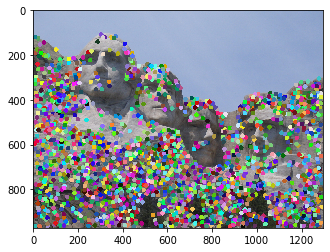

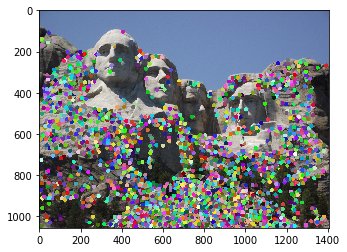

In [16]:
x1, y1, _, scales1, _ = get_interest_points(image1_bw, feature_width)
x2, y2, _, scales2, _ = get_interest_points(image2_bw, feature_width)
# x1, y1, x2, y2 = cheat_interest_points(eval_file, scale_factor)
# plt.figure(); plt.imshow(image1_bw)

# Visualize the interest points
c1 = show_interest_points(image1, x1, y1)
c2 = show_interest_points(image2, x2, y2)
plt.figure(); plt.imshow(c1)
plt.figure(); plt.imshow(c2)
print('{:d} corners in image 1, {:d} corners in image 2'.format(len(x1), len(x2)))

## Create feature vectors at each interest point (Szeliski 4.1.2)

In [17]:
image1_features = get_features(image1_bw, x1, y1, feature_width, scales1)
image2_features = get_features(image2_bw, x2, y2, feature_width, scales2)

## Match features (Szeliski 4.1.3)

In [18]:
matches, confidences = match_features(image1_features, image2_features, x1, y1, x2, y2)
print('{:d} matches from {:d} corners'.format(len(matches), len(x1)))

281 matches from 2000 corners


## Visualization

You might want to set 'num_pts_to_visualize' and 'num_pts_to_evaluate' to some constant (e.g. 100) once you start detecting hundreds of interest points, otherwise things might get too cluttered. You could also threshold based on confidence.  
  
There are two visualization functions below. You can comment out one of both of them if you prefer.

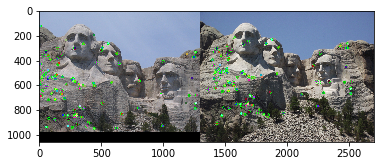

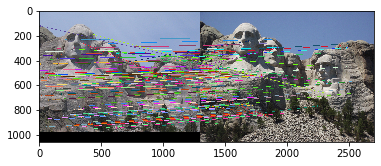

In [19]:
# num_pts_to_visualize = len(matches)
num_pts_to_visualize = 100
c1 = show_correspondence_circles(image1, image2,
                    x1[matches[:num_pts_to_visualize, 0]], y1[matches[:num_pts_to_visualize, 0]],
                    x2[matches[:num_pts_to_visualize, 1]], y2[matches[:num_pts_to_visualize, 1]])
plt.figure(); plt.imshow(c1)
plt.savefig('../results/vis_circles_2.jpg', dpi=1000)
c2 = show_correspondence_lines(image1, image2,
                    x1[matches[:num_pts_to_visualize, 0]], y1[matches[:num_pts_to_visualize, 0]],
                    x2[matches[:num_pts_to_visualize, 1]], y2[matches[:num_pts_to_visualize, 1]])
plt.figure(); plt.imshow(c2)
plt.savefig('../results/vis_lines_2.jpg', dpi=1000)

Comment out the function below if you are not testing on the Notre Dame, Episcopal Gaudi, and Mount Rushmore image pairs--this evaluation function will only work for those which have ground truth available.  
  
You can use `annotate_correspondences/collect_ground_truth_corr.py` to build the ground truth for other image pairs if you want, but it's very tedious. It would be a great service to the class for future years, though!

Correct
Incorrect
Correct
Correct
Correct
Correct
Incorrect
Correct
Correct
Correct
Incorrect
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Incorrect
Correct
Correct
Correct
Correct
Incorrect
Incorrect
Incorrect
Correct
Incorrect
Correct
Correct
Correct
Incorrect
Correct
Correct
Incorrect
Incorrect
Correct
Correct
Correct
Correct
Incorrect
Incorrect
Correct
Incorrect
Correct
Correct
Incorrect
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Incorrect
Incorrect
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Incorrect
Correct
Correct
Correct
Incorrect
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Incorrect
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
You found 100/100 required matches
Accuracy = 0.800000


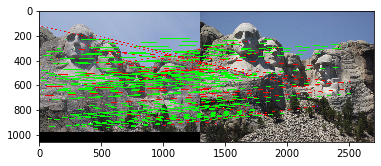

In [20]:
# num_pts_to_evaluate = len(matches)
num_pts_to_evaluate = 100
_, c = evaluate_correspondence(image1, image2, eval_file, scale_factor,
                        x1[matches[:num_pts_to_evaluate, 0]], y1[matches[:num_pts_to_evaluate, 0]],
                        x2[matches[:num_pts_to_evaluate, 1]], y2[matches[:num_pts_to_evaluate, 1]])
plt.figure(); plt.imshow(c)
plt.savefig('../results/eval_2.jpg', dpi=1000)